# Задание:

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:

        * одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
   
        * SVM;
   
        * дерево решений.
   
6. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
7. Постройте график, показывающий важность признаков в дереве решений.
8. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

In [3]:
cancer = load_breast_cancer()

In [4]:
data_df = pd.DataFrame(data = cancer.data,
                       columns = cancer.feature_names) 
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
data_df["target"] = cancer.target
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
data_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
data_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


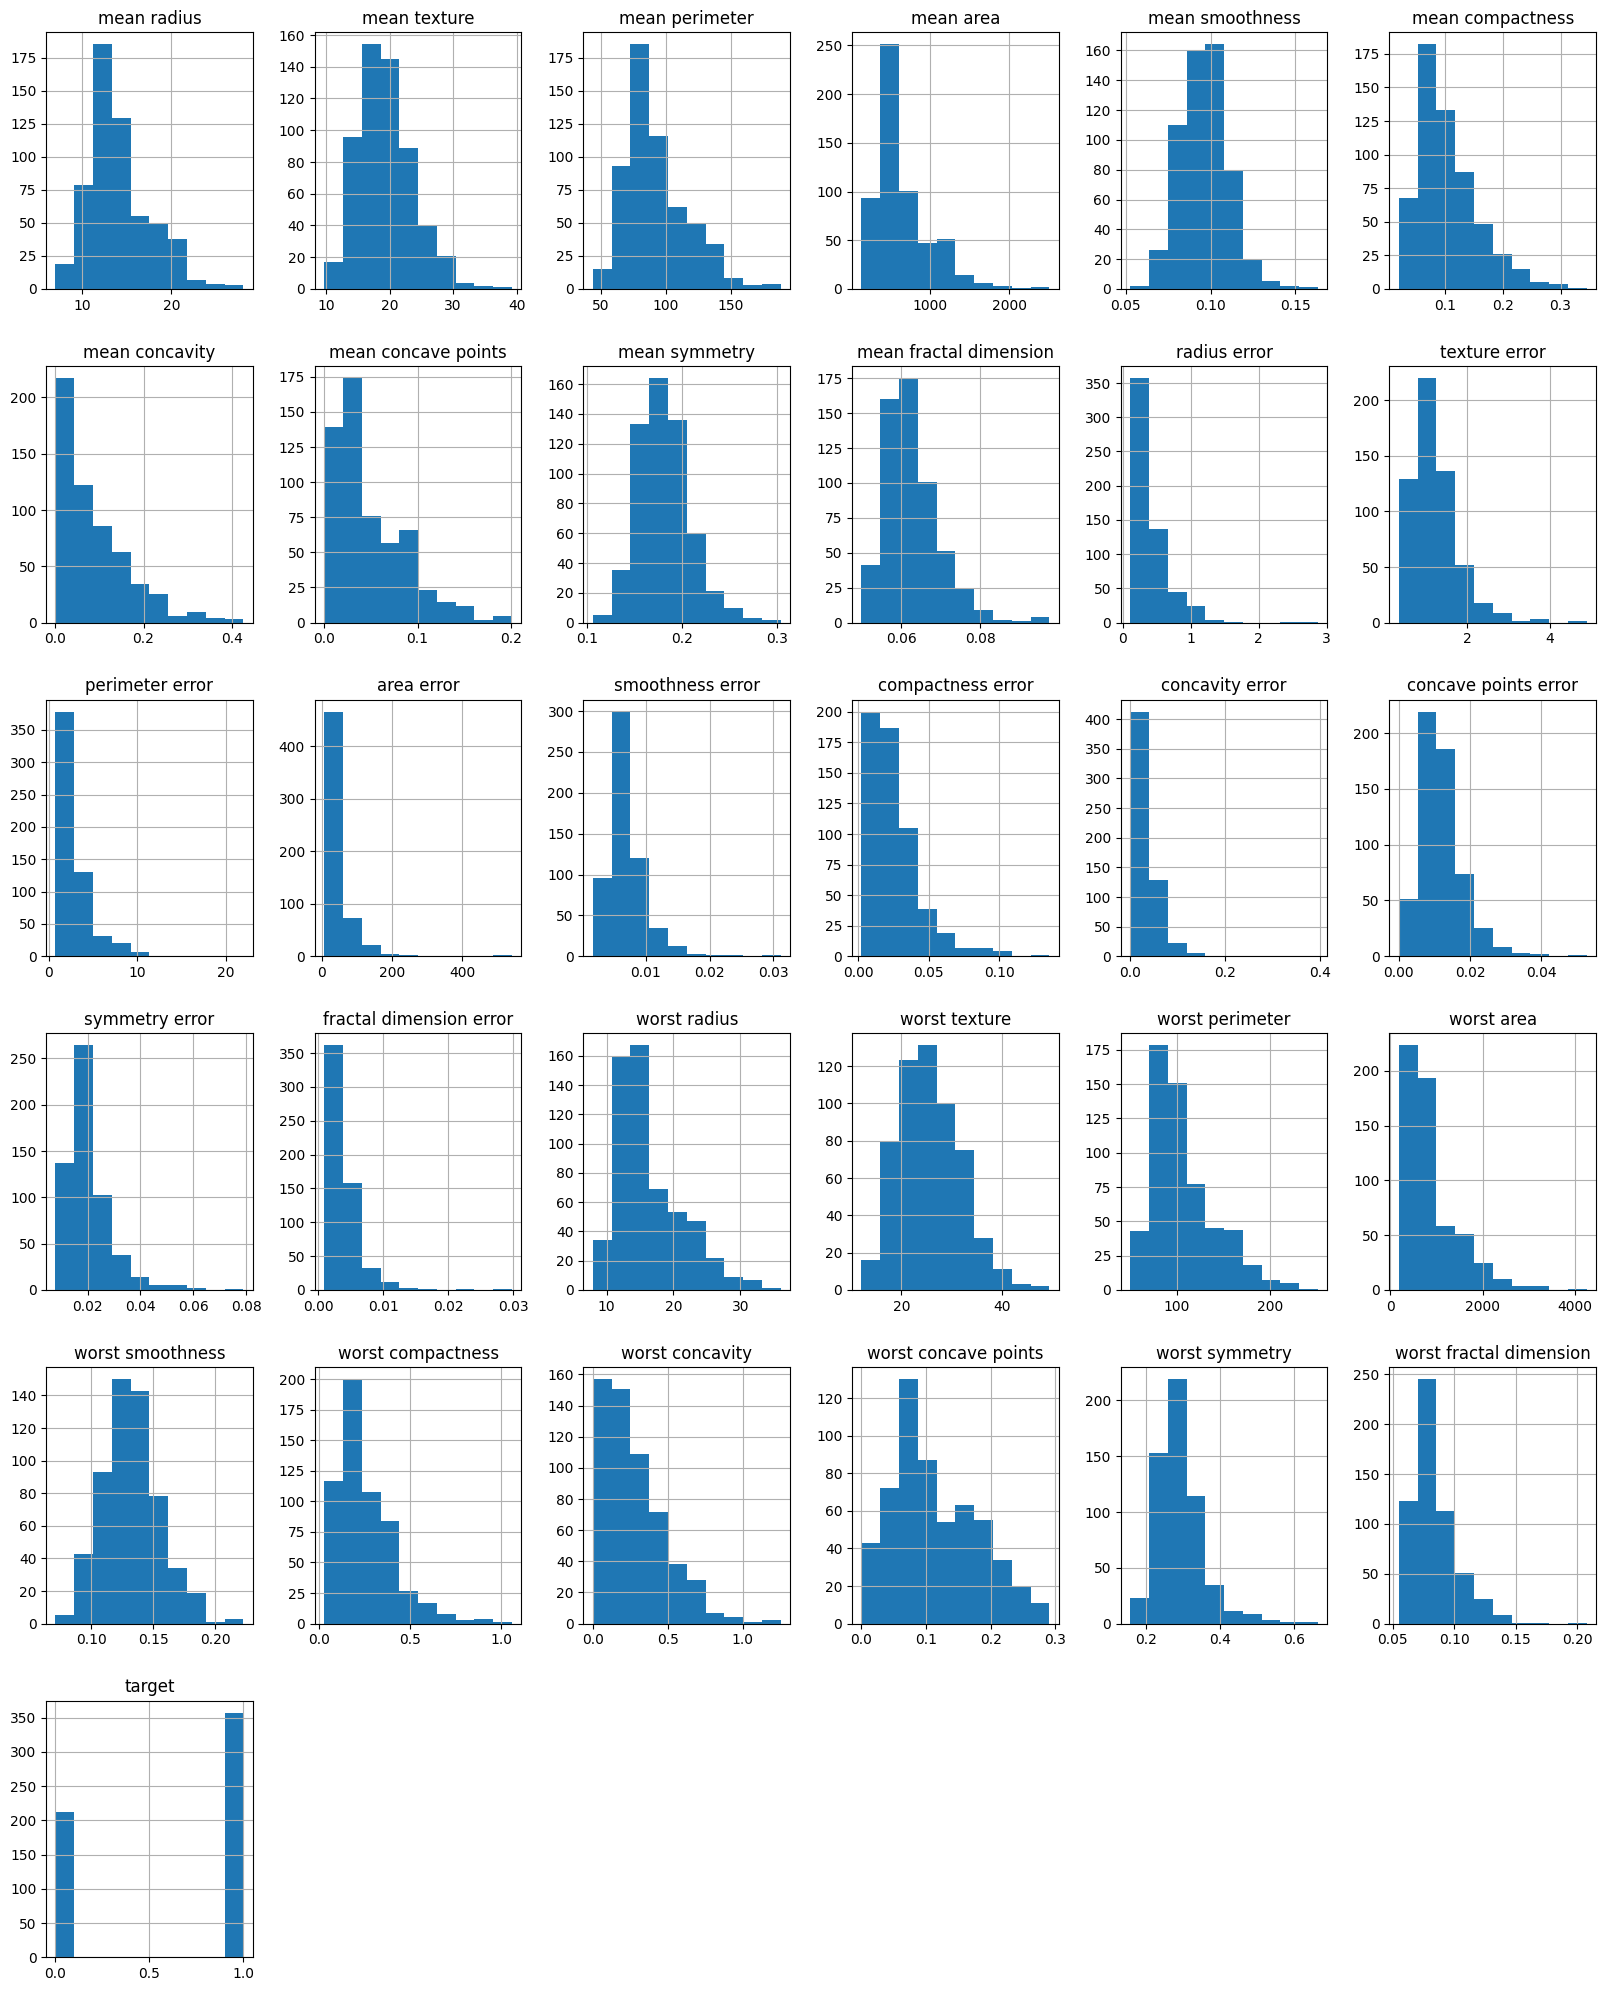

In [8]:
data_df.hist(figsize=(20,25))
plt.show()

In [9]:
scaler = MinMaxScaler()

scaler.fit(data_df.drop('target', axis=1))
scaled_features = scaler.transform(data_df.drop('target',
                                           axis=1))
 
df_feat = pd.DataFrame(scaled_features,
                       columns=data_df.columns[:-1])
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


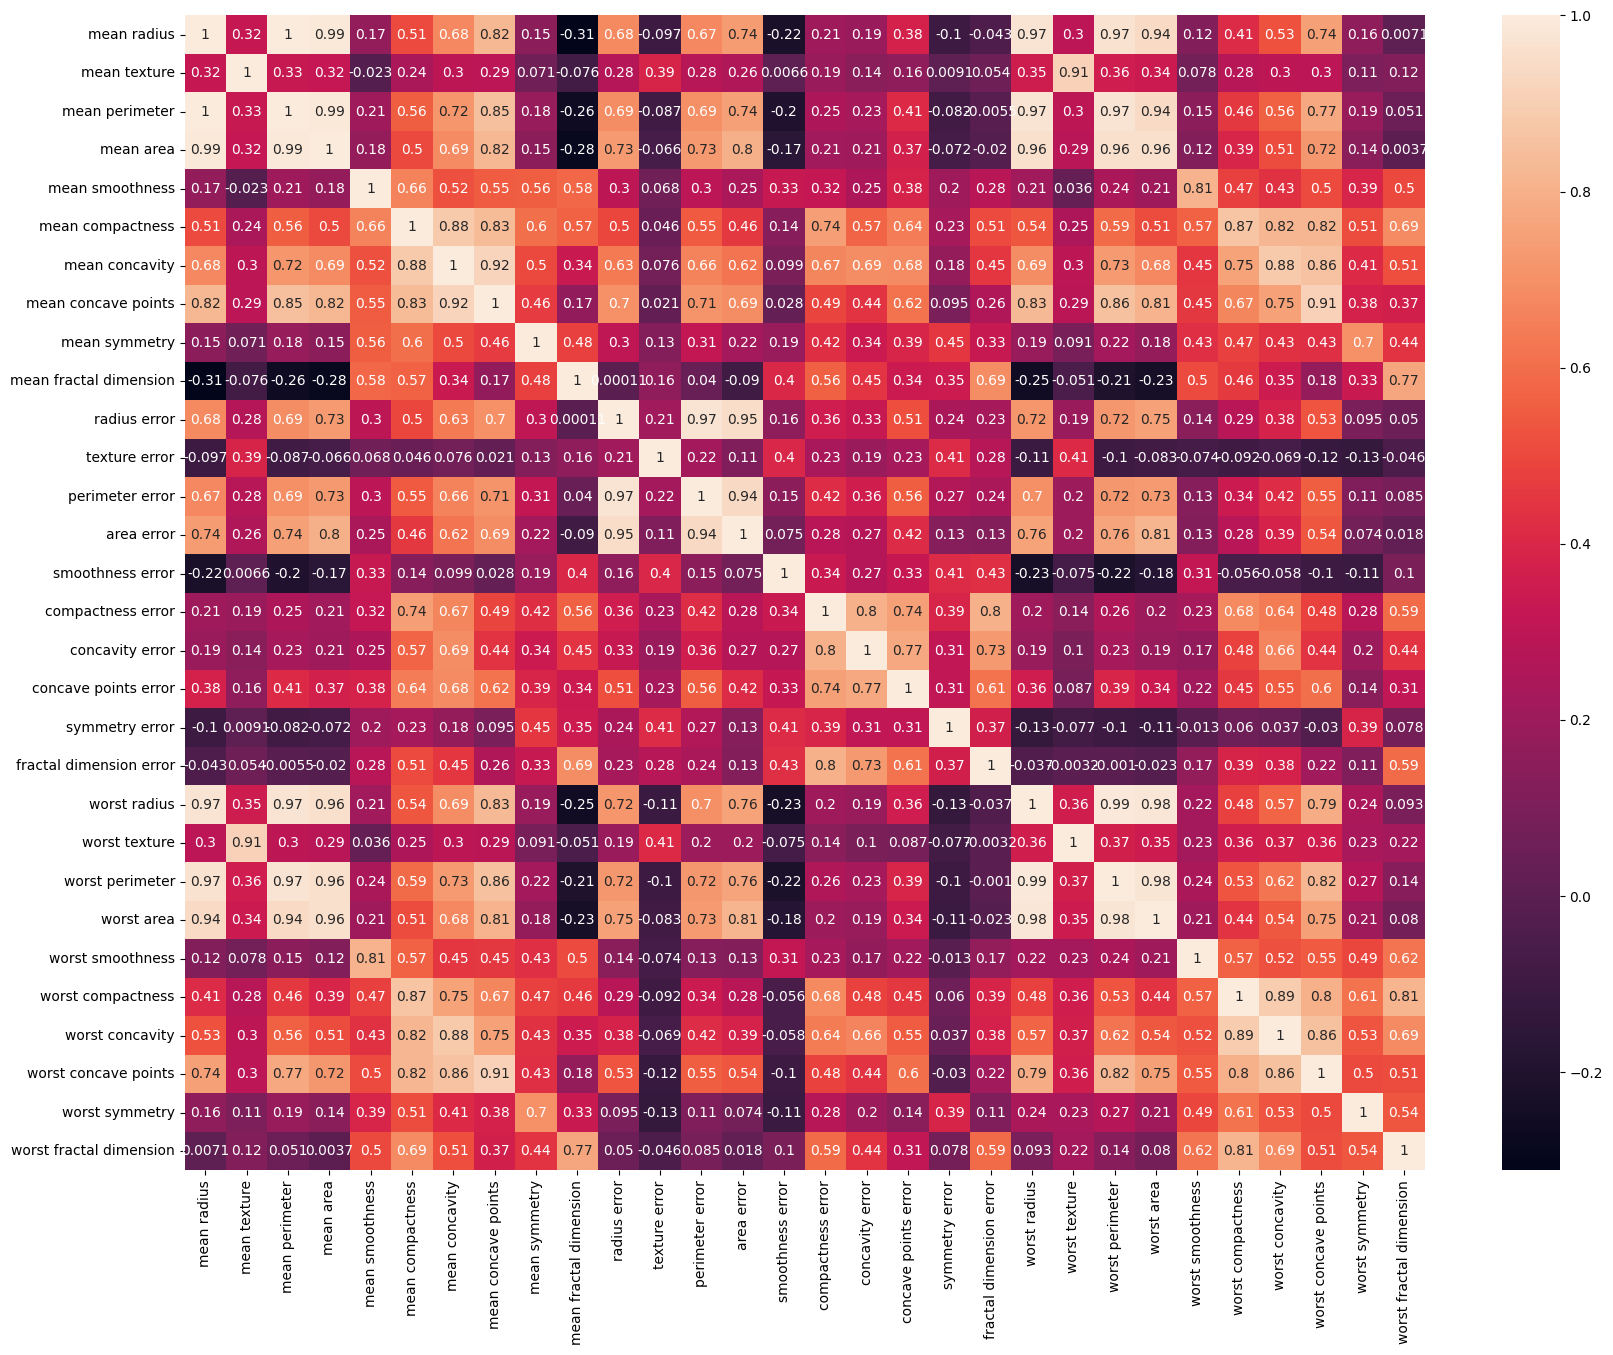

In [10]:
import seaborn as sns
plt.figure(figsize=(20,15))
ax = sns.heatmap(df_feat.corr(),annot=True)
plt.show()

In [11]:
corr_matrix = df_feat.corr().abs()
# Верхний треугольник матрицы, чтобы не учитывать дубли
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

df_reduced = df_feat.drop(columns=to_drop)
df_reduced

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry
0,0.521037,0.022658,0.593753,0.792037,0.686364,0.605518,0.356147,0.120469,0.159296,0.351398,0.300625,0.311645,0.598462
1,0.643144,0.272574,0.289880,0.181768,0.379798,0.141323,0.156437,0.082589,0.119387,0.081323,0.253836,0.084539,0.233590
2,0.601496,0.390260,0.514309,0.431017,0.509596,0.211247,0.229622,0.094303,0.150831,0.283955,0.389847,0.205690,0.403706
3,0.210090,0.360839,0.811321,0.811361,0.776263,1.000000,0.139091,0.175875,0.251453,0.543215,0.353665,0.728148,1.000000
4,0.629893,0.156578,0.430351,0.347893,0.378283,0.186816,0.233822,0.093065,0.332359,0.167918,0.357075,0.136179,0.157500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.526948,0.296055,0.336364,0.132056,0.385479,0.197976,0.291906,0.200213,0.464861,0.045843,0.097575
565,0.622320,0.626987,0.407782,0.257714,0.349495,0.113100,0.236828,0.464728,0.137879,0.165064,0.317863,0.156160,0.198502
566,0.455251,0.621238,0.288165,0.254340,0.267677,0.137321,0.124896,0.157974,0.142435,0.263301,0.294942,0.074548,0.128721
567,0.644564,0.663510,0.588336,0.790197,0.675253,0.425442,0.222524,0.272896,0.163477,0.445579,0.315211,0.216103,0.497142


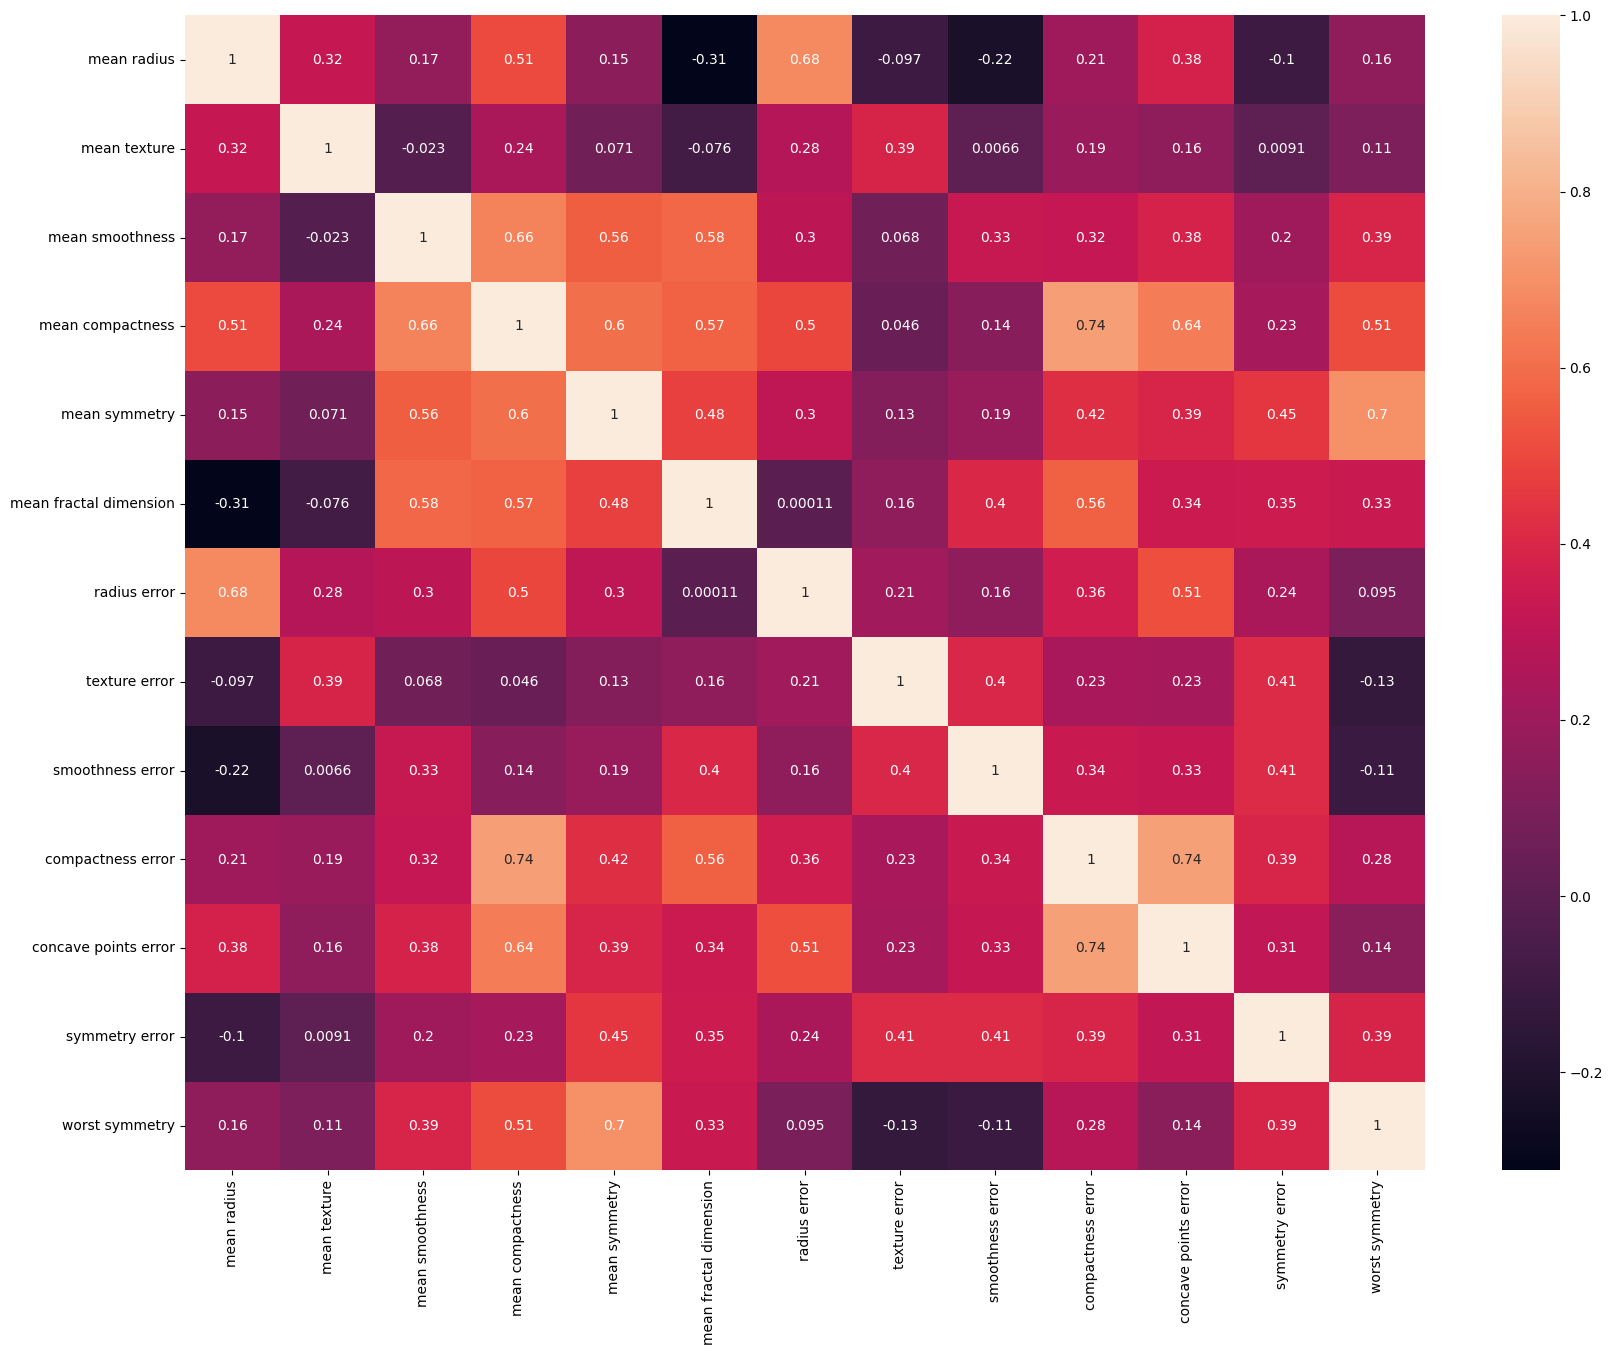

In [12]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(df_reduced.corr(),annot=True)
plt.show()

In [13]:
X = df_reduced
y = data_df["target"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
# ------ Логрег
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [30]:
# ------ SVM
from sklearn.svm import LinearSVC, SVC
# X = X.iloc[:, :2]
# svm = LinearSVC(C=1.0, loss='hinge')
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X, y)
y_pred_svm = svm.predict(X_test)

In [31]:
# ------ Дерево решений
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, classification_report
# print("Логрег accuracy:", accuracy_score(y_test, y_pred_logreg))
# print("SVM accuracy:", accuracy_score(y_test, y_pred_svm))
# print("Дерево решений accuracy:", accuracy_score(y_test, y_pred_tree))

print("\nЛогрег репорт\n", classification_report(y_test, y_pred_logreg, digits=4))
print("\nSVM репорт\n", classification_report(y_test, y_pred_svm, digits=4))
print("\nДерево решений репорт\n", classification_report(y_test, y_pred_tree, digits=4))


Логрег репорт
               precision    recall  f1-score   support

           0     0.9516    0.8806    0.9147        67
           1     0.9365    0.9752    0.9555       121

    accuracy                         0.9415       188
   macro avg     0.9441    0.9279    0.9351       188
weighted avg     0.9419    0.9415    0.9409       188


SVM репорт
               precision    recall  f1-score   support

           0     0.9552    0.9552    0.9552        67
           1     0.9752    0.9752    0.9752       121

    accuracy                         0.9681       188
   macro avg     0.9652    0.9652    0.9652       188
weighted avg     0.9681    0.9681    0.9681       188


Дерево решений репорт
               precision    recall  f1-score   support

           0     0.8971    0.9104    0.9037        67
           1     0.9500    0.9421    0.9461       121

    accuracy                         0.9309       188
   macro avg     0.9235    0.9263    0.9249       188
weighted avg     0.93

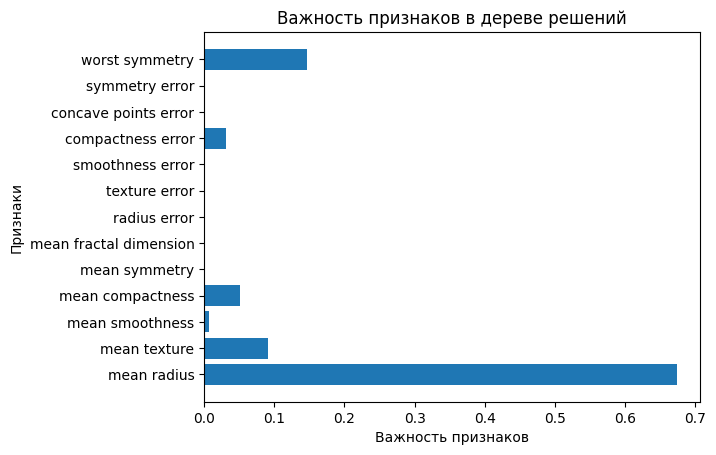

In [33]:
# Важность признаков в дереве решений
feature_importances = tree.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel("Важность признаков")
plt.ylabel("Признаки")
plt.title("Важность признаков в дереве решений")
plt.show()

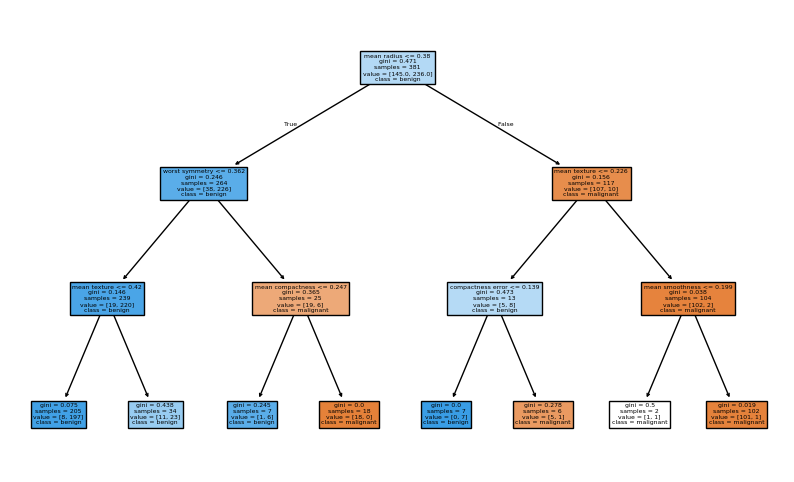

In [34]:
# Визуализация дерева решений
plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, class_names=["malignant", "benign"], filled=True)
plt.show()

In [35]:
# Правила дерева решений в текстовом виде
from sklearn.tree import export_text
tree_rules = export_text(tree, feature_names=list(X.columns))
print("Правила решений дерева в текстовом виде:")
print(tree_rules)

Правила решений дерева в текстовом виде:
|--- mean radius <= 0.38
|   |--- worst symmetry <= 0.36
|   |   |--- mean texture <= 0.42
|   |   |   |--- class: 1
|   |   |--- mean texture >  0.42
|   |   |   |--- class: 1
|   |--- worst symmetry >  0.36
|   |   |--- mean compactness <= 0.25
|   |   |   |--- class: 1
|   |   |--- mean compactness >  0.25
|   |   |   |--- class: 0
|--- mean radius >  0.38
|   |--- mean texture <= 0.23
|   |   |--- compactness error <= 0.14
|   |   |   |--- class: 1
|   |   |--- compactness error >  0.14
|   |   |   |--- class: 0
|   |--- mean texture >  0.23
|   |   |--- mean smoothness <= 0.20
|   |   |   |--- class: 0
|   |   |--- mean smoothness >  0.20
|   |   |   |--- class: 0

